# Step 1: Import Libraries and Load Datasets

In [81]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar
from datetime import datetime, timedelta, date
import os
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report, accuracy_score, f1_score, ConfusionMatrixDisplay

import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import plotly.io as pio
pd.set_option('display.max_row', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
## warning
import warnings
warnings.filterwarnings("ignore")

In [82]:
# Load the datasets
df_teams = pd.read_csv('data/teams_2021-2022_cleaned.csv')
df_players = pd.read_csv('data/players_2021-2022_cleaned.csv')
print('df_teams shape :', df_teams.shape)
print('df_players shape :', df_players.shape)


df_teams shape : (98, 20)
df_players shape : (2920, 119)


In [83]:
df_teams.head()

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,38,29,6,3,99,26,73,93,2.45,89.0,27.2,61.9,1.63,52774,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,38,28,8,2,94,26,68,92,2.42,89.2,34.2,55.0,1.45,53367,Mohamed Salah - 23,Alisson
2,3,Bayern Munich,GER,1,34,24,5,5,97,37,60,77,2.26,88.1,37.1,51.0,1.50,33176,Robert Lewandowski - 35,Manuel Neuer
3,4,Paris S-G,FRA,1,38,26,8,4,90,36,54,86,2.26,76.5,38.6,37.9,1.00,41188,Kylian Mbappé - 28,Keylor Navas
4,5,Real Madrid,ESP,1,38,26,8,4,80,31,49,86,2.26,74.3,47.0,27.3,0.72,41235,Karim Benzema - 27,Thibaut Courtois


In [84]:
df_players.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,Sw,PasCrs,CK,CkIn,CkOut,CkStr,TI,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Blocks,BlkSh,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Max Aarons,ENG,DF,Norwich City,Premier League,22,2000,34,32,2881,32.0,0,13,2,15.4,0,0,656,0,0,0,1088,1440,75.5,18371,6874,560,621,90.0,419,544,77.0,98,217,45.2,2,19,50,36,8,94,1440,1101,339,27,2,19,45,0,0,0,0,311,1088,7,56,38,27,2,3,4,2,0,5,5,0,0,0,0,0,69,37,50,19,0,37,58,63.8,21,86,22,64,56,125,70,0,1856,162,746,762,480,29,1530,1085,6381,3894,174,53,13,27,30,1037,41,8,0,0,31,59,1,45,37,0,2,1,177,15,51,22.7
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34,1987,34,34,2983,33.1,2,18,6,33.3,4,11,619,0,0,0,1281,1556,82.4,27665,9529,338,377,89.9,741,828,89.4,187,303,61.7,0,8,81,6,0,90,1556,1456,100,81,0,55,2,0,0,0,0,14,1281,5,29,21,14,0,3,1,0,3,1,0,0,1,0,0,0,62,46,41,20,1,13,27,48.1,14,62,26,36,103,165,106,0,1897,274,1086,851,96,28,1804,1182,6776,3823,91,24,0,15,13,1202,12,5,1,0,43,24,0,2,46,0,1,0,224,67,45,59.8
2,3,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22,2000,31,29,2462,27.4,1,18,5,27.8,2,5,556,0,0,0,1532,1671,91.7,28312,5053,616,660,93.5,707,745,94.9,184,214,86.0,0,15,77,13,1,81,1671,1652,20,16,1,22,10,0,0,0,0,4,1532,2,23,40,30,0,0,4,4,2,1,1,0,0,0,0,0,55,34,25,25,5,19,59,32.2,40,27,1,26,51,106,15,0,1929,55,622,1145,299,17,1915,1466,6754,2913,78,20,4,23,40,1485,47,12,3,2,45,35,0,10,34,0,0,0,240,24,24,50.0
3,4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29,1993,34,34,2956,32.8,0,30,7,23.3,0,0,741,0,0,0,1335,1633,81.6,25610,6757,535,604,88.6,567,643,87.9,205,308,66.6,2,30,127,19,6,137,1633,1607,28,21,6,49,26,1,0,0,0,5,1335,7,55,66,49,2,1,1,7,6,5,4,0,0,0,1,0,117,73,49,56,12,59,163,36.2,104,55,3,52,84,201,11,0,2020,22,449,1322,380,15,1998,1499,5638,2834,94,37,3,28,48,1410,61,9,0,0,46,68,1,26,73,0,0,0,291,14,14,50.0
4,5,Charles Abi,FRA,FW,Saint-Étienne,Ligue 1,22,2000,1,1,45,0.5,0,0,0,0.0,0,0,0,0,0,0,2,6,33.3,24,0,1,2,50.0,1,3,33.3,0,0,0.0,0,0,0,0,0,0,6,6,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,1,0,1,0,0,0,0,12,0,0,5,9,3,12,9,59,9,0,1,0,4,0,8,2,0,0,0,1,0,0,1,0,0,0,0,2,1,0,100.0


# Step 2: Data Preparation

In [85]:
df_teams.isnull().sum()

Rk                 0
Squad              0
Country            0
LgRk               0
MP                 0
W                  0
D                  0
L                  0
GF                 0
GA                 0
GD                 0
Pts                0
Pts/G              0
xG                 0
xGA                0
xGD                0
xGD/90             0
Attendance         0
Top Team Scorer    0
Goalkeeper         0
dtype: int64

GcaPassLive : Completed live-ball passes that lead to a goal
GcaPassDead : Completed dead-ball passes that lead to a goal
Blocks : Number of times blocking the ball by standing in its path
DriSucc : Dribbles completed successfully
Clr : Clearances
Err : Mistakes leading to an opponent's shot
Off : Offsides
Crs : Crosses
TklW : Tackles in which the tackler's team won possession of the ball
PKwon : Penalty kicks won
PKcon : Penalty kicks conceded
OG : Own goals
Recov : Number of loose balls recovered
AerWon : Aerials won
AerLost : Aerials lost
Blocks : Number of times blocking the ball by standing in its path


In [86]:
# Merging the datasets
# We will aggregate player data at the team level and then merge it with the teams data
df_players['Key_Passes'] = df_players['GcaPassLive'] + df_players['GcaPassDead']
df_players['DriSucc'] = df_players['ScaDrib'] + df_players['GcaDrib']
# Aggregating player data
players_aggregated = df_players.groupby('Squad').agg(
    Average_Age=pd.NamedAgg(column='Age', aggfunc='mean'),
    Key_Passes=pd.NamedAgg(column='Key_Passes', aggfunc='sum'),
    Prog_Passes=pd.NamedAgg(column='PasProg', aggfunc='sum'),
    Tackles_Won=pd.NamedAgg(column='TklW', aggfunc='sum'),
    Shots_OT=pd.NamedAgg(column='SoT', aggfunc='sum'),
    Successful_Dribbles=pd.NamedAgg(column='DriSucc', aggfunc='sum'),
    Carries_3rd=pd.NamedAgg(column='Car3rd', aggfunc='sum'),
    Crosses=pd.NamedAgg(column='Crs', aggfunc='sum'),
    Aerials_Won=pd.NamedAgg(column='AerWon', aggfunc='sum'),
    Aerials_Lost=pd.NamedAgg(column='AerLost', aggfunc='sum'),
    Interceptions=pd.NamedAgg(column='Int', aggfunc='sum'),
    Clearances=pd.NamedAgg(column='Clr', aggfunc='sum'),
    Blocks=pd.NamedAgg(column='Blocks', aggfunc='sum'),
    Fouls_Committed=pd.NamedAgg(column='Fls', aggfunc='sum'),
    Fouls_Drawn=pd.NamedAgg(column='Fld', aggfunc='sum'),
    Yellow_Cards=pd.NamedAgg(column='CrdY', aggfunc='sum'),
    Red_Cards=pd.NamedAgg(column='CrdR', aggfunc='sum'),
    Penalty_Won=pd.NamedAgg(column='PKwon', aggfunc='sum'),
    Penalty_Con=pd.NamedAgg(column='PKcon', aggfunc='sum'),
    Errors=pd.NamedAgg(column='Err', aggfunc='sum'),
    Offsides=pd.NamedAgg(column='Off', aggfunc='sum'),
    Own_Goals=pd.NamedAgg(column='OG', aggfunc='sum'),
).reset_index()
'PasTotCmp%', 'Assists', 'PasProg', 'TklW', 'SoT%', 'DriSucc', 'Car3rd', 'Crs', 'AerWon', 'Int', 'Clr', 'Blocks'
# Merging with the teams data
merged_data = pd.merge(df_teams, players_aggregated, on='Squad', how='left')

# Displaying the first few rows of the merged data for an overview
merged_data.head()

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper,Average_Age,Key_Passes,Prog_Passes,Tackles_Won,Shots_OT,Successful_Dribbles,Carries_3rd,Crosses,Aerials_Won,Aerials_Lost,Interceptions,Clearances,Blocks,Fouls_Committed,Fouls_Drawn,Yellow_Cards,Red_Cards,Penalty_Won,Penalty_Con,Errors,Offsides,Own_Goals
0,1,Manchester City,ENG,1,38,29,6,3,99,26,73,93,2.45,89.0,27.2,61.9,1.63,52774,Kevin De Bruyne - 15,Ederson,25.884615,105,1766,324,239,70,831,610,530,433,434,474,392,373,442,42,1,7,1,7,65,0
1,2,Liverpool,ENG,2,38,28,8,2,94,26,68,92,2.42,89.2,34.2,55.0,1.45,53367,Mohamed Salah - 23,Alisson,26.222222,119,1967,366,237,83,691,554,621,549,552,566,462,422,395,50,1,5,0,7,63,1
2,3,Bayern Munich,GER,1,34,24,5,5,97,37,60,77,2.26,88.1,37.1,51.0,1.50,33176,Robert Lewandowski - 35,Manuel Neuer,25.066667,132,1884,391,254,54,644,495,540,477,544,418,489,343,432,36,2,1,2,12,76,1
3,4,Paris S-G,FRA,1,38,26,8,4,90,36,54,86,2.26,76.5,38.6,37.9,1.00,41188,Kylian Mbappé - 28,Keylor Navas,26.111111,110,1579,408,202,90,733,363,284,240,488,434,409,391,468,79,4,6,3,11,93,1
4,5,Real Madrid,ESP,1,38,26,8,4,80,31,49,86,2.26,74.3,47.0,27.3,0.72,41235,Karim Benzema - 27,Thibaut Courtois,26.387097,107,1569,404,240,81,760,483,444,372,520,537,480,460,557,76,0,10,5,14,106,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rk                   98 non-null     int64  
 1   Squad                98 non-null     object 
 2   Country              98 non-null     object 
 3   LgRk                 98 non-null     int64  
 4   MP                   98 non-null     int64  
 5   W                    98 non-null     int64  
 6   D                    98 non-null     int64  
 7   L                    98 non-null     int64  
 8   GF                   98 non-null     int64  
 9   GA                   98 non-null     int64  
 10  GD                   98 non-null     int64  
 11  Pts                  98 non-null     int64  
 12  Pts/G                98 non-null     float64
 13  xG                   98 non-null     float64
 14  xGA                  98 non-null     float64
 15  xGD                  98 non-null     float

In [ ]:
merged_data.info()

## 1. Correlation Analysis
Investigate how player statistics correlate with team performance. For example, you could look at:

#### Is there a relationship between the average age of players in a team and the team's performance?


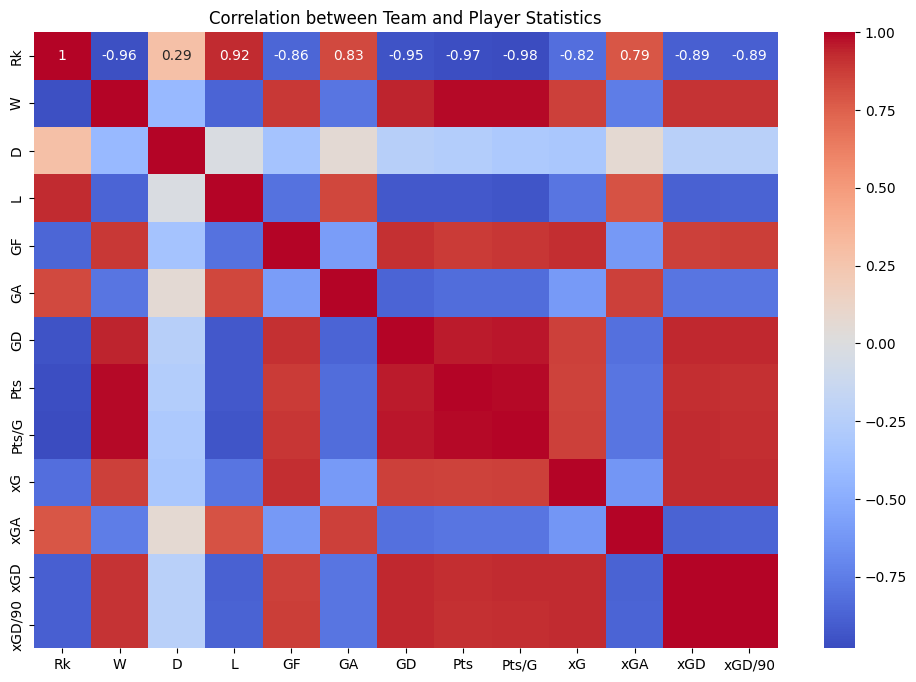

In [88]:
team_columns = ['Rk', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/G', 'xG', 'xGA', 'xGD', 'xGD/90']
corr_data = merged_data[team_columns]

# Correlation matrix
corr_matrix = corr_data.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Team and Player Statistics')
plt.show()

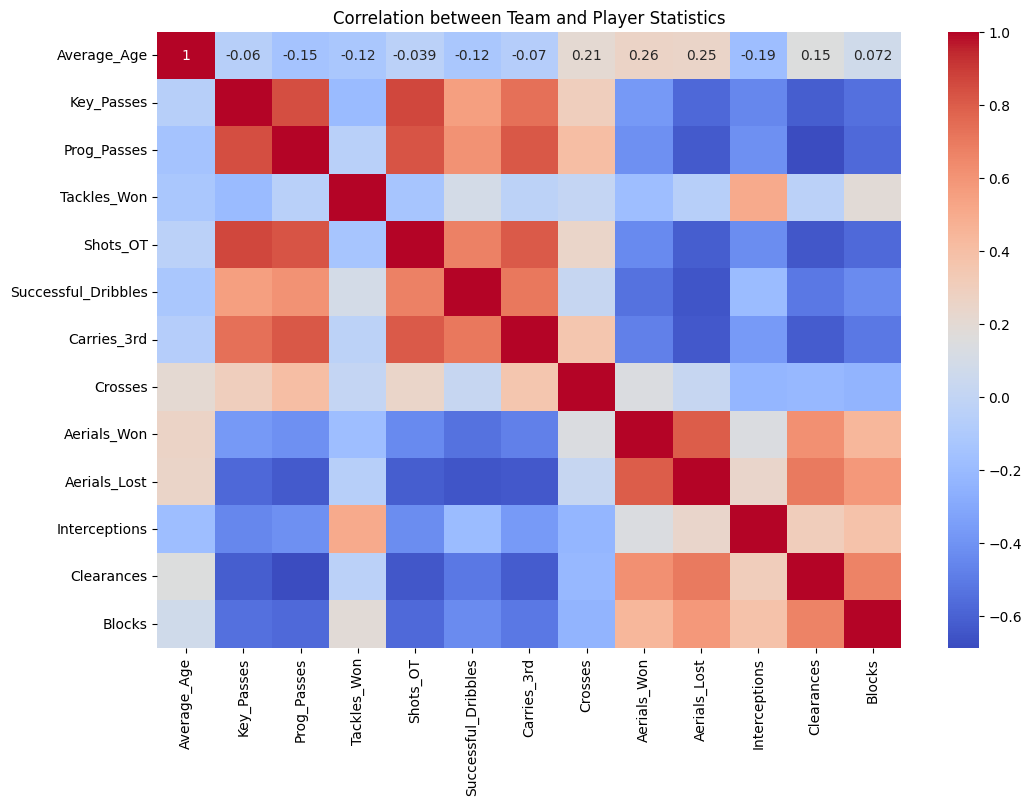

In [89]:
player_columns = ['Average_Age', 'Key_Passes', 'Prog_Passes', 'Tackles_Won', 'Shots_OT', 'Successful_Dribbles', 'Carries_3rd', 'Crosses', 'Aerials_Won', 'Aerials_Lost', 'Interceptions', 'Clearances', 'Blocks']
corr_data = merged_data[player_columns]

# Correlation matrix
corr_matrix = corr_data.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Team and Player Statistics')
plt.show()

In [90]:
defensive_columns = ['Tackles_Won', 'Crosses', 'Aerials_Lost', 'Interceptions', 'Clearances', 'Blocks']
offensive_columns = ['Key_Passes', 'Prog_Passes', 'Shots_OT', 'Successful_Dribbles', 'Carries_3rd', 'Crosses', 'Aerials_Won']

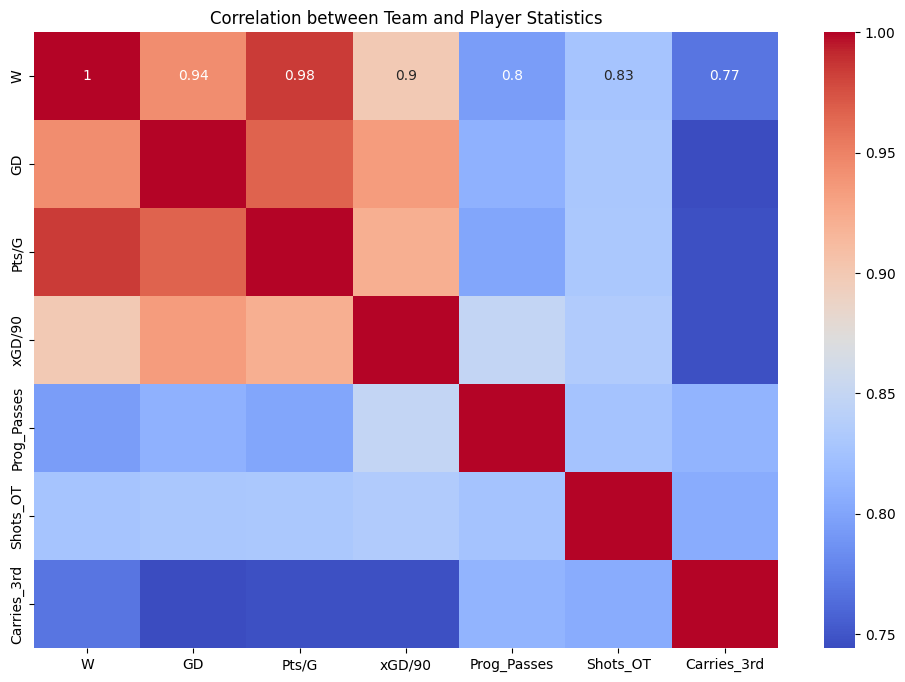

In [91]:
corr_columns = ['W', 'GD', 'Pts/G', 'xGD/90', 'Prog_Passes', 'Shots_OT', 'Carries_3rd']
corr_data = merged_data[corr_columns]

# Correlation matrix
corr_matrix = corr_data.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Team and Player Statistics')
plt.show()

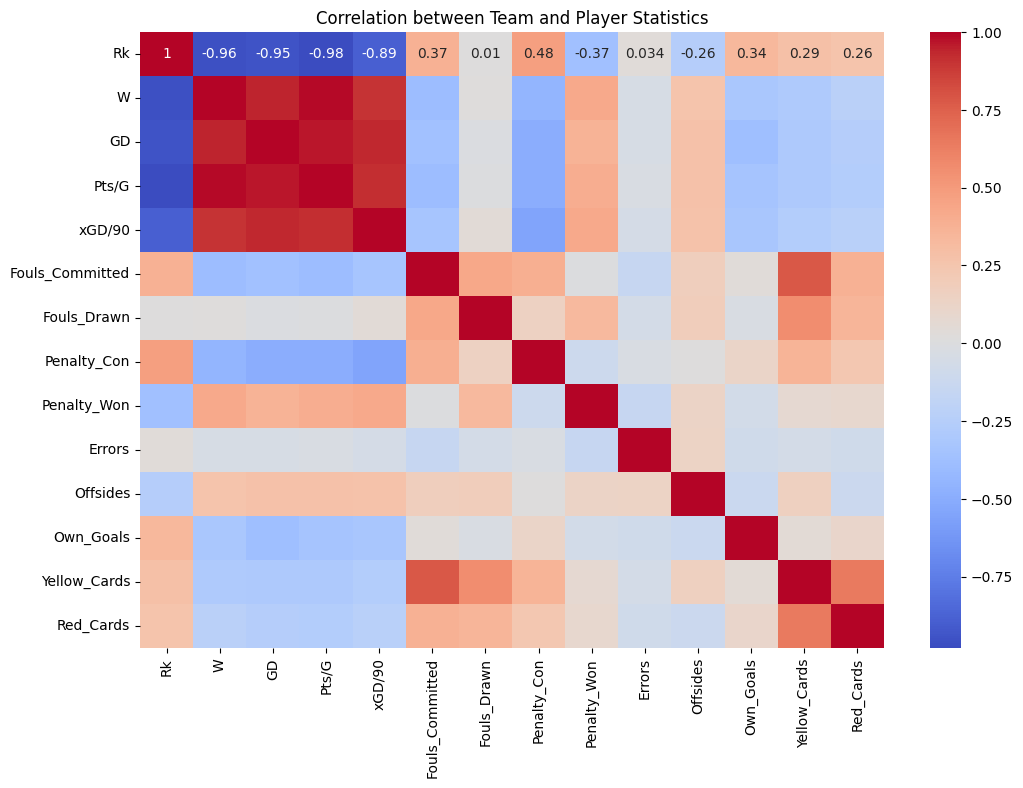

In [92]:
other_columns = ['Rk', 'W', 'GD', 'Pts/G', 'xGD/90', 'Fouls_Committed', 'Fouls_Drawn', 'Penalty_Con', 'Penalty_Won', 'Errors', 'Offsides', 'Own_Goals', 'Yellow_Cards', 'Red_Cards']
corr_data = merged_data[other_columns]

# Correlation matrix
corr_matrix = corr_data.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Team and Player Statistics')
plt.show()

These correlations can provide valuable insights into the dynamics of football team performance. Let's explore what these correlations might indicate:

1. 'Rk' (Rank) and 'W' (Wins): A strong negative correlation is expected here, as teams with more wins typically have a lower (better) rank.

2. 'GD' (Goal Difference) and 'Pts/G' (Points per Game): Teams with a higher goal difference often have a higher points per game ratio, indicating a strong positive correlation. A better goal difference usually results from winning more matches, which contributes to a higher points tally.

3. 'xGD/90' (Expected Goal Difference per 90 minutes): This metric, when positively correlated with 'Pts/G' and 'W', suggests that teams expected to have a better goal difference also tend to win more games and secure more points per game. This reflects the effectiveness of a team's offensive and defensive strategies.

4. 'Prog_Passes' (Progressive Passes): A strong correlation with 'W' or 'Pts/G' indicates that teams making more forward-moving passes tend to win more. This can be a sign of a team’s proactive and attacking playstyle.

5. 'Shots_OT' (Shots on Target): Teams with more shots on target likely score more goals, leading to more wins and a higher points per game average. This correlation underscores the importance of not just creating chances, but also effectively converting them into shots on target.

6. 'Carries_3rd' (Carries into the Final Third): If this has a strong correlation with wins or points per game, it suggests that teams who frequently carry the ball into attacking areas are more likely to score and win.

### Implications in Football Analysis
Understanding these correlations can help in multiple ways:

- Tactical Analysis: Coaches can focus on improving aspects like progressive passes, shots on target, and ball carries into the final third to enhance team performance.
- Team Assessment: Analysts can evaluate teams based on these metrics to predict their success in leagues and matches.
Player Performance: These correlations can guide scouts and managers in identifying player skills crucial for the team's tactical approach.

In [93]:
df_teams.sort_values(by='Pts/G', ascending=False).head()

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,38,29,6,3,99,26,73,93,2.45,89.0,27.2,61.9,1.63,52774,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,38,28,8,2,94,26,68,92,2.42,89.2,34.2,55.0,1.45,53367,Mohamed Salah - 23,Alisson
2,3,Bayern Munich,GER,1,34,24,5,5,97,37,60,77,2.26,88.1,37.1,51.0,1.50,33176,Robert Lewandowski - 35,Manuel Neuer
3,4,Paris S-G,FRA,1,38,26,8,4,90,36,54,86,2.26,76.5,38.6,37.9,1.00,41188,Kylian Mbappé - 28,Keylor Navas
4,5,Real Madrid,ESP,1,38,26,8,4,80,31,49,86,2.26,74.3,47.0,27.3,0.72,41235,Karim Benzema - 27,Thibaut Courtois


In [94]:
merged_data.sort_values(by='Shots_OT', ascending=False).head()[['Rk', 'Squad', 'Country', 'LgRk', 'W', 'GD', 'Pts/G', 'xGD/90', 'Prog_Passes', 'Shots_OT', 'Carries_3rd']]

,Rk,Squad,Country,LgRk,W,GD,Pts/G,xGD/90,Prog_Passes,Shots_OT,Carries_3rd
2,3,Bayern Munich,GER,1,24,60,2.26,1.50,1884,254,644
4,5,Real Madrid,ESP,1,26,49,2.26,0.72,1569,240,760
0,1,Manchester City,ENG,1,29,73,2.45,1.63,1766,239,831
6,7,Inter,ITA,2,25,52,2.21,1.11,1515,238,575
1,2,Liverpool,ENG,2,28,68,2.42,1.45,1967,237,691


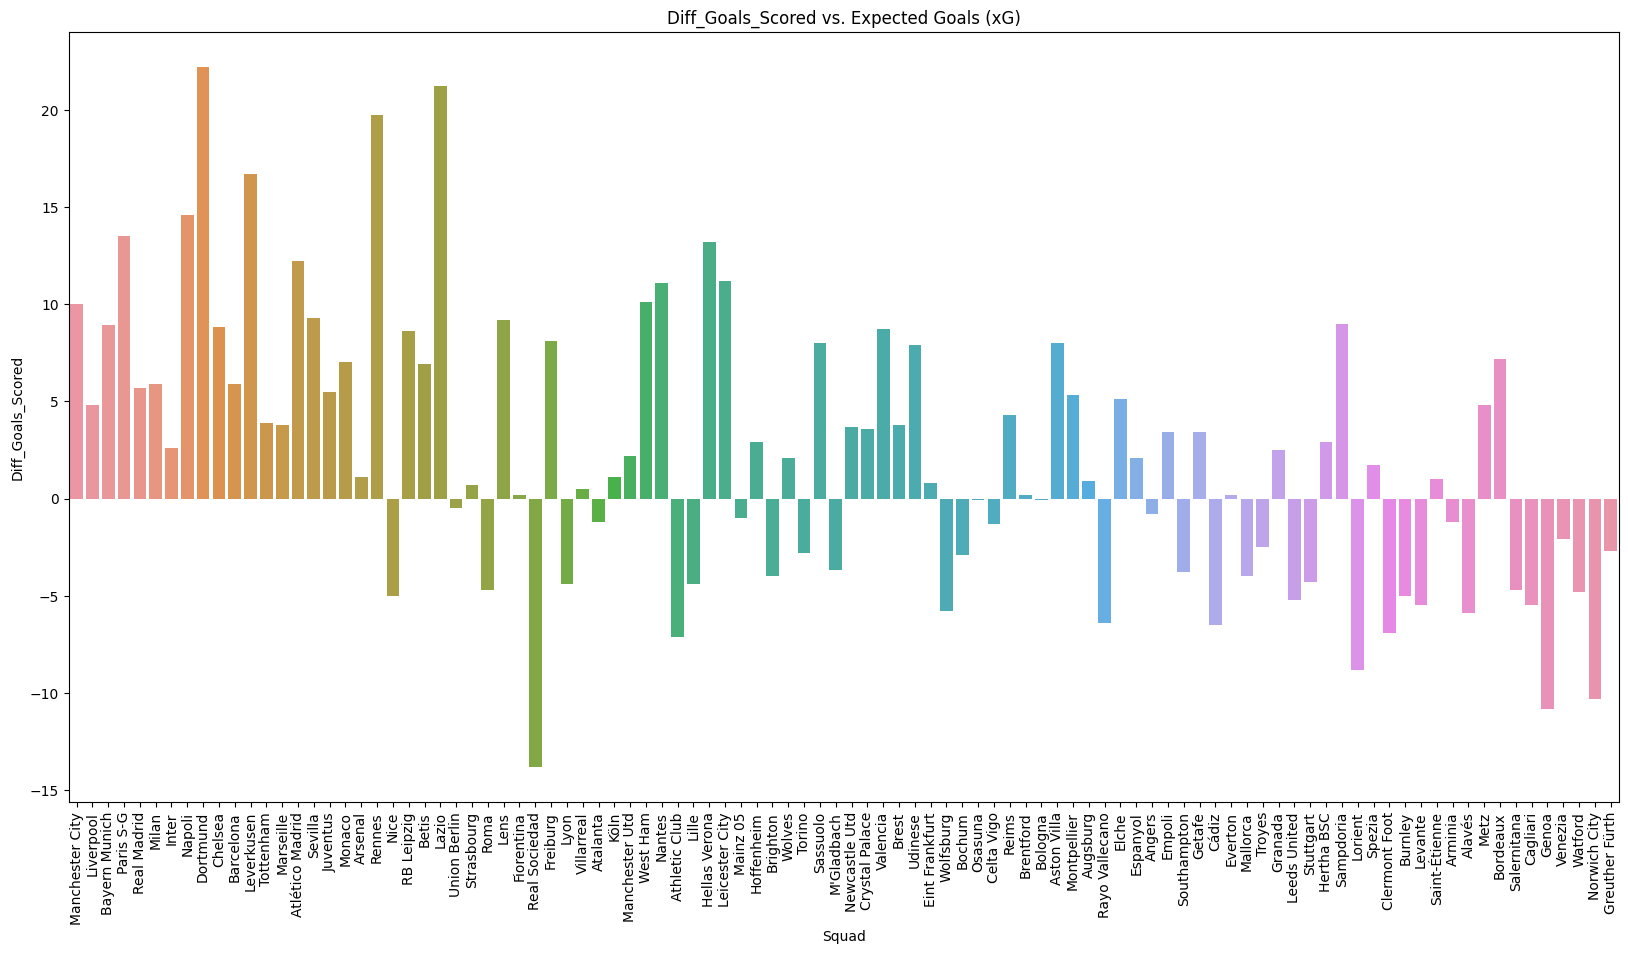

In [95]:
merged_data['Diff_Goals_Scored'] = merged_data['GF'] - merged_data['xG']  # Actual goals scored - expected goals
# Visualization of Goal Difference vs. xG
plt.figure(figsize=(20, 10))
sns.barplot(x='Squad', y='Diff_Goals_Scored', data=merged_data)
plt.xticks(rotation=90)
plt.title('Diff_Goals_Scored vs. Expected Goals (xG)')
plt.show()

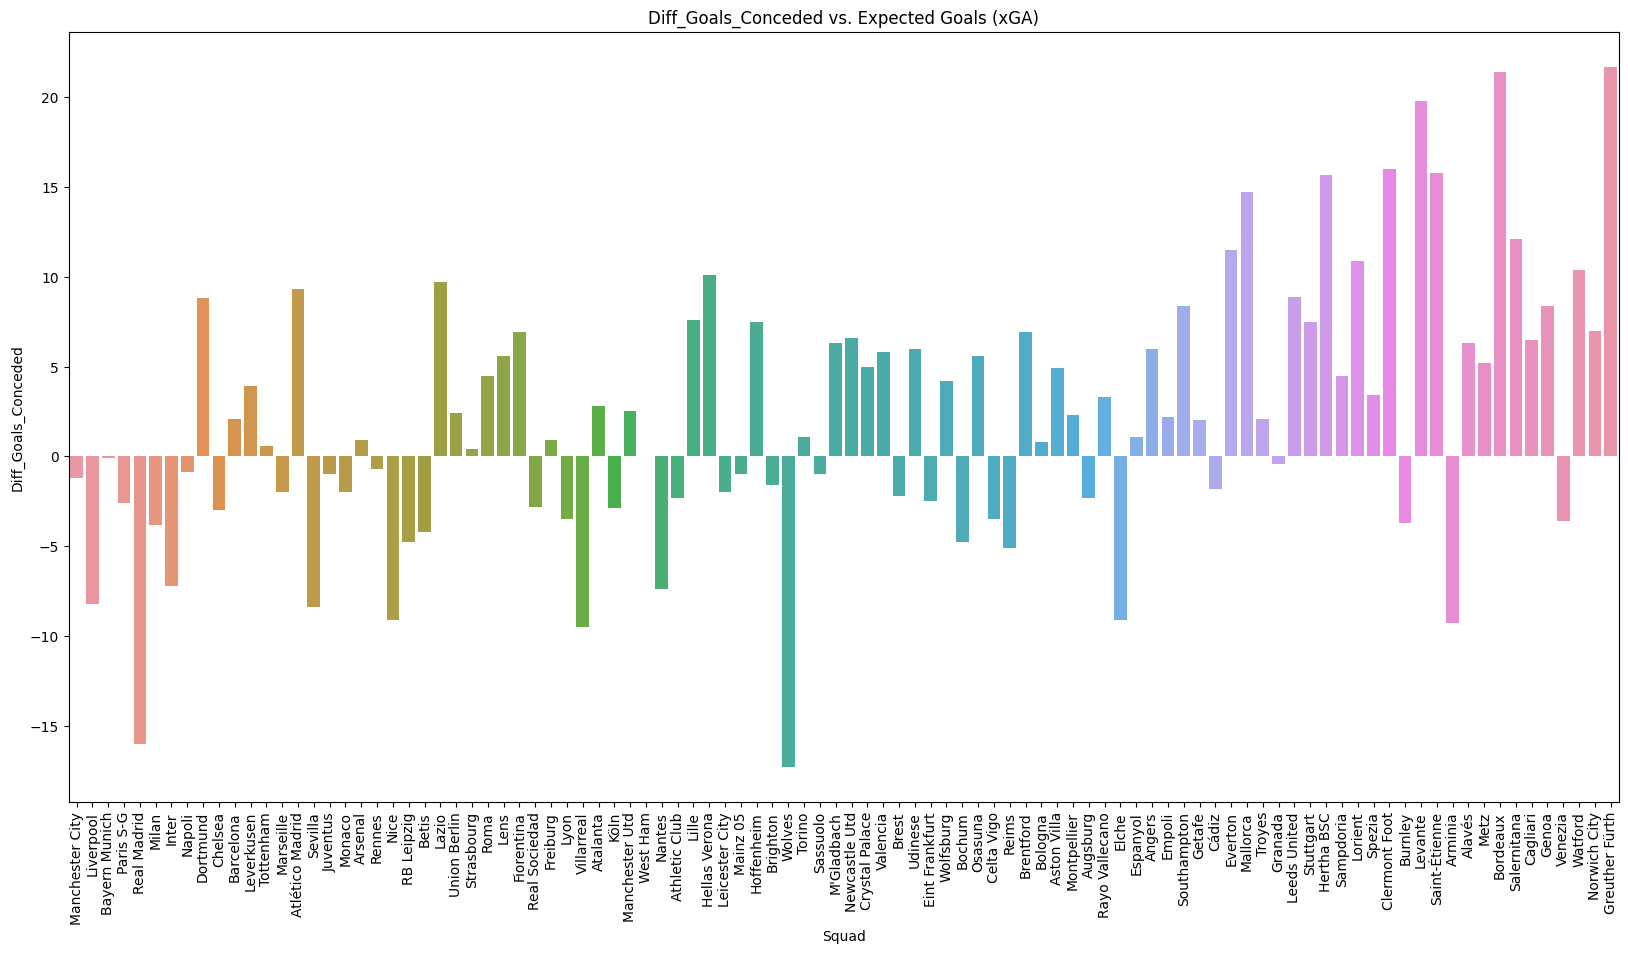

In [96]:
merged_data['Diff_Goals_Conceded'] = merged_data['GA'] - merged_data['xGA']  # Actual goals conceded - expected goals against
# Visualization of Goal Difference vs. xGA
plt.figure(figsize=(20, 10))
sns.barplot(x='Squad', y='Diff_Goals_Conceded', data=merged_data)
plt.xticks(rotation=90)
plt.title('Diff_Goals_Conceded vs. Expected Goals (xGA)')
plt.show()

## For Underperforming Teams:

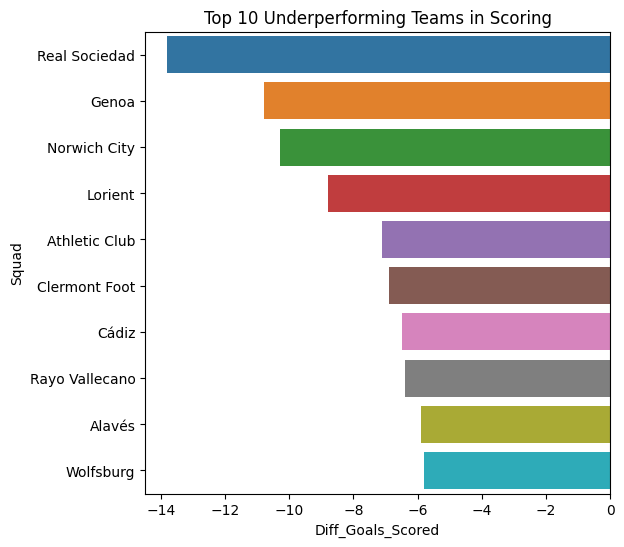

In [97]:
underperforming_scoring = merged_data.sort_values(by='Diff_Goals_Scored').head(10)
# Example for visualizing underperforming teams in scoring
plt.figure(figsize=(6, 6))
sns.barplot(y='Squad', x='Diff_Goals_Scored', data=underperforming_scoring)
#plt.xticks(rotation=90)
plt.title('Top 10 Underperforming Teams in Scoring')
plt.show()


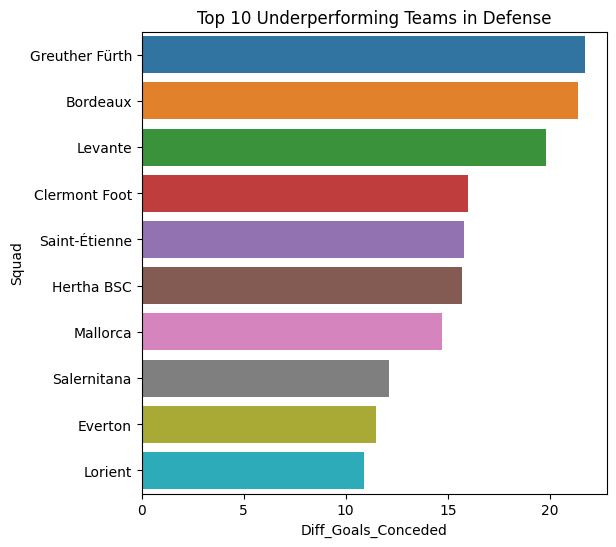

In [98]:
underperforming_defense = merged_data.sort_values(by='Diff_Goals_Conceded', ascending=False).head(10)
# Example for visualizing underperforming teams in scoring
plt.figure(figsize=(6, 6))
sns.barplot(y='Squad', x='Diff_Goals_Conceded', data=underperforming_defense)
#plt.xticks(rotation=90)
plt.title('Top 10 Underperforming Teams in Defense')
plt.show()

## For Overperforming Teams:

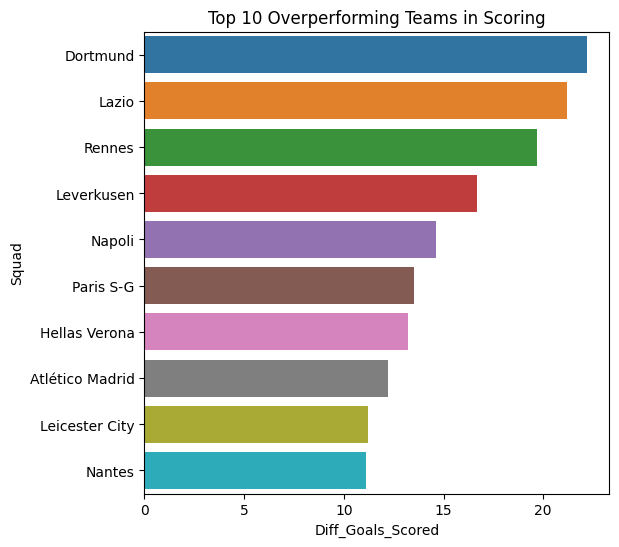

In [99]:
overperforming_scoring = merged_data.sort_values(by='Diff_Goals_Scored', ascending=False).head(10)
# Example for visualizing underperforming teams in scoring
plt.figure(figsize=(6, 6))
sns.barplot(y='Squad', x='Diff_Goals_Scored', data=overperforming_scoring)
#plt.xticks(rotation=90)
plt.title('Top 10 Overperforming Teams in Scoring')
plt.show()

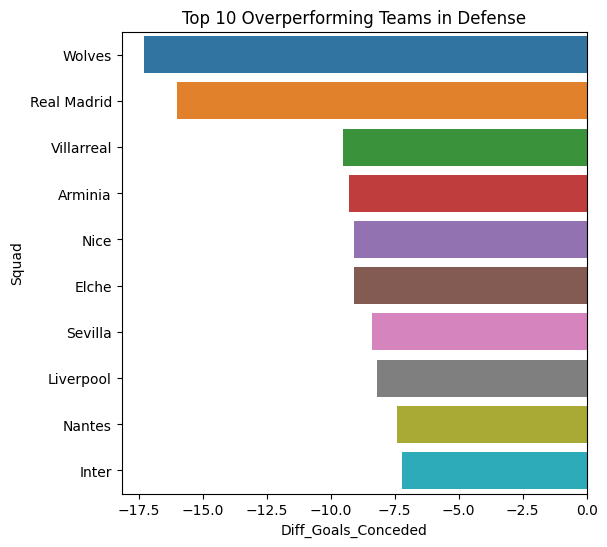

In [100]:
overperforming_defense = merged_data.sort_values(by='Diff_Goals_Conceded').head(10)
# Example for visualizing underperforming teams in scoring
plt.figure(figsize=(6, 6))
sns.barplot(y='Squad', x='Diff_Goals_Conceded', data=overperforming_defense)
#plt.xticks(rotation=90)
plt.title('Top 10 Overperforming Teams in Defense')
plt.show()

# Clustering Teams Based on Metrics (Unsupervised Learning)

## Step 1: Data Preparation


In [172]:
### Select Relevant Features:
selected_features = merged_data[['W', 'GD', 'Pts/G', 'xGD/90','Prog_Passes', 'Shots_OT', 'Carries_3rd', 'Tackles_Won', 'Crosses', 'Aerials_Won',
                     'Clearances', 'Blocks', 'Fouls_Committed', 'Fouls_Drawn', 'Penalty_Con', 'Penalty_Won', 
                     'Offsides', 'Own_Goals', 'Yellow_Cards', 'Red_Cards']]

In [173]:
# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_features)

In [171]:
scaled_data

array([[ 2.59129654,  2.69624145,  2.45315992, ..., -1.35294118,
        -1.93801214, -1.10088809],
       [ 2.42063319,  2.51156738,  2.38494569, ..., -0.52941176,
        -1.5103731 , -1.10088809],
       [ 1.7379798 ,  2.21608887,  2.02113648, ..., -0.52941176,
        -2.25874142, -0.67780169],
       ...,
       [-1.33396045, -1.58819702, -1.73064597, ...,  1.11764706,
        -0.81545965, -0.25471528],
       [-1.50462379, -2.25302368, -1.79886019, ...,  0.29411765,
        -1.13618894, -1.10088809],
       [-1.84595049, -1.99447998, -1.91255057, ...,  2.76470588,
        -0.92236941, -1.5239745 ]])

## Step 2: Choosing a Clustering Algorithm

1. ***K-Means:*** A popular choice for its simplicity and effectiveness. It's ideal for spherical clusters and when you have an idea of the number of clusters.

2. ***Hierarchical Clustering:*** Useful if you're unsure about the number of clusters and want a tree-like view of data groupings.


# 1. K-Means Clustring



### a) The Silhouette Scores:

In [174]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


silhouette_scores = []
for k in range(2, 11):  # Assuming you want to test cluster counts from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(score)

# Find the number of clusters with the highest Silhouette Score
optimal_clusters = range(2, 11)[silhouette_scores.index(max(silhouette_scores))]
optimal_clusters, silhouette_scores

(2,
 [0.24015493191052262,
  0.15765690158681436,
  0.14540562264453322,
  0.13530134177035802,
  0.12354002729010992,
  0.114903775455388,
  0.12894207595951396,
  0.12292610683295481,
  0.1080827275652706])

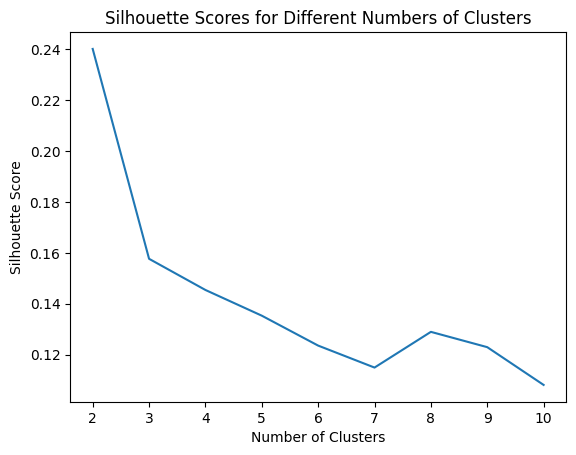

In [175]:
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.show()


The value of 2 (number of clusters) with the highest Silhouette Score is typically considered the optimal choice. A higher Silhouette Score indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

### b) The Elbow Method:

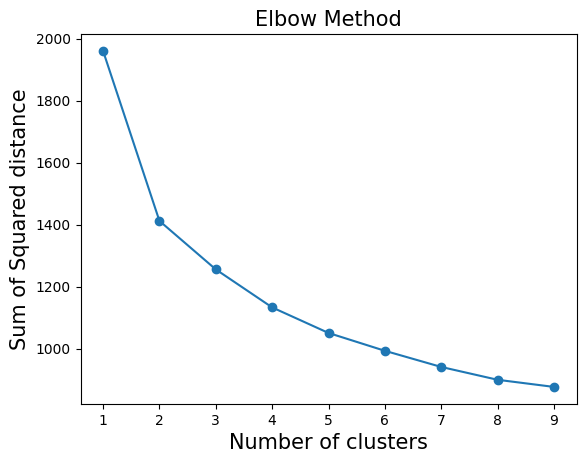

In [176]:
# plot elbow curve
elb = []
krange = range(1,10)
for k in krange:
    km = KMeans(n_clusters=k)
    km.fit(scaled_data)
    elb.append(km.inertia_)

plt.plot(krange, elb, marker='o')
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('Sum of Squared distance',fontsize=15)
plt.show()

# Applying K-Means (n_clusters = 2)

In [177]:
# Applying K-Means
kmeans2_model = KMeans(n_clusters=2, random_state=42)
kmeans2_model.fit(scaled_data)
km2_clusters = kmeans2_model.labels_
#count number of records in every cluster
pd.Series(km2_clusters).value_counts()

0    66
1    32
Name: count, dtype: int64

In [178]:
## model evaluation
print('WCSS: ', km.inertia_)

WCSS:  876.8855479210772


In [179]:
import joblib

# Save your model to a file
joblib.dump(kmeans2_model, 'kmeans2_model.pkl')

['kmeans2_model.pkl']

In [180]:
team_cluster_df = pd.DataFrame(merged_data[['Rk', 'Squad', 'Country', 'LgRk', 'W', 'G', 'GA','GD', 'xGD', 'Pts/G', 'xGD/90', 'Prog_Passes', 'Shots_OT', 'Carries_3rd',
                             'Tackles_Won', 'Crosses', 'Aerials_Won', 'Interceptions', 'Clearances', 'Blocks',
                             'Fouls_Committed', 'Fouls_Drawn', 'Penalty_Con', 'Penalty_Won', 'Errors', 'Offsides', 'Own_Goals', 'Yellow_Cards', 'Red_Cards']]
)
team_cluster_df['km_cluster_2'] = km2_clusters
cluster_0 = team_cluster_df[team_cluster_df['km_cluster_2'] == 0][['Squad', 'Country']]
cluster_1 = team_cluster_df[team_cluster_df['km_cluster_2'] == 1][['Squad', 'Country']]
km2_clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

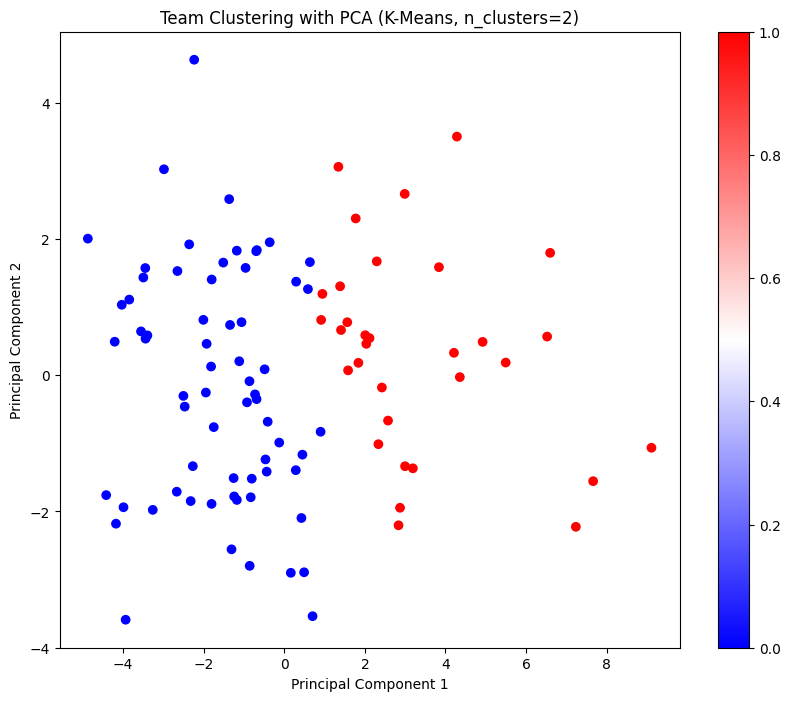

In [181]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=km2_clusters, cmap='bwr')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Team Clustering with PCA (K-Means, n_clusters=2)')
plt.colorbar()
plt.show()


In [182]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame for Plotly
df_pca = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = km2_clusters

# Plot
fig = px.scatter(df_pca, x='PC1', y='PC2', color='Cluster', title='PCA Cluster Visualization')
fig.show()

In [186]:
team_cluster_df.head()

,Rk,Squad,Country,LgRk,W,GD,Pts/G,xGD/90,Prog_Passes,Shots_OT,Carries_3rd,Tackles_Won,Crosses,Aerials_Won,Interceptions,Clearances,Blocks,Fouls_Committed,Fouls_Drawn,Penalty_Con,Penalty_Won,Errors,Offsides,Own_Goals,Yellow_Cards,Red_Cards,km_cluster_2,Cluster
0,1,Manchester City,ENG,1,29,73,2.45,1.63,1766,239,831,324,610,530,434,474,392,373,442,1,7,7,65,0,42,1,1,Offensive
1,2,Liverpool,ENG,2,28,68,2.42,1.45,1967,237,691,366,554,621,552,566,462,422,395,0,5,7,63,1,50,1,1,Offensive
2,3,Bayern Munich,GER,1,24,60,2.26,1.50,1884,254,644,391,495,540,544,418,489,343,432,2,1,12,76,1,36,2,1,Offensive
3,4,Paris S-G,FRA,1,26,54,2.26,1.00,1579,202,733,408,363,284,488,434,409,391,468,3,6,11,93,1,79,4,1,Offensive
4,5,Real Madrid,ESP,1,26,49,2.26,0.72,1569,240,760,404,483,444,520,537,480,460,557,5,10,14,106,0,76,0,1,Offensive


In [112]:
team_cluster_stats = team_cluster_df.iloc[:,4:].groupby('km_cluster_2').mean()
print(team_cluster_stats)


                      W         GD     Pts/G    xGD/90  Prog_Passes    Shots_OT  Carries_3rd  Tackles_Won     Crosses  Aerials_Won  Interceptions  Clearances      Blocks  Fouls_Committed  Fouls_Drawn  Penalty_Con  Penalty_Won    Errors   Offsides  Own_Goals  Yellow_Cards  Red_Cards
km_cluster_2                                                                                                                                                                                                                                                                              
0             10.484848 -14.818182  1.125303 -0.292727  1045.227273  135.651515   396.772727   407.272727  423.424242   685.151515     585.530303  769.833333  589.363636       522.757576   482.742424     6.166667     3.590909  8.590909  65.409091   1.863636     80.212121   3.772727
1             20.687500  30.562500  1.878125  0.605000  1432.468750  185.531250   571.125000   394.312500  456.593750   566.531250     533.218750  590.

### Interpretation
Based on the analysis and visualizations, KMeans Clustering shows that:

- ***Cluster 0:*** From the dominant features, this cluster has lower values in attacking metrics (W, GD, Pts/G, xGD/90, Prog_Passes, Shots_OT, Carries_3rd), which represent represent defensively oriented teams.
- ***Cluster 1:*** In contrast, this cluster has higher values in attacking metrics (W, GD, Pts/G, xGD/90, Prog_Passes, Shots_OT, Carries_3rd), which represent  offensively oriented teams. also in this cluster values are relatively lower for the defensive metrics 


In [184]:
team_cluster_df.loc[team_cluster_df['km_cluster_2'] == 0, 'Cluster'] = 'Defensive'
team_cluster_df.loc[team_cluster_df['km_cluster_2'] == 1, 'Cluster'] = 'Offensive'


In [187]:
team_cluster_df.to_csv('team_cluster.csv', index=False)

# Applying K-Means (n_clusters = 3)

In [163]:
# Applying K-Means
kmeans3_model = KMeans(n_clusters=3, random_state=42)
kmeans3_model.fit(scaled_data)
km3_clusters = kmeans3_model.labels_
#count number of records in every cluster
pd.Series(km3_clusters).value_counts()

2    38
0    32
1    28
Name: count, dtype: int64

In [137]:
## model evaluation
print('WCSS: ', km.inertia_)

WCSS:  867.9671005788773


In [158]:

team_cluster_df['km_cluster_3'] = km3_clusters
cluster_0 = team_cluster_df[team_cluster_df['km_cluster_3'] == 0][['Squad', 'Country']]
cluster_1 = team_cluster_df[team_cluster_df['km_cluster_3'] == 1][['Squad', 'Country']]
cluster_1

,Squad,Country
0,Manchester City,ENG
1,Liverpool,ENG
2,Bayern Munich,GER
3,Paris S-G,FRA
4,Real Madrid,ESP
5,Milan,ITA
6,Inter,ITA
7,Napoli,ITA
8,Dortmund,GER
9,Chelsea,ENG


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


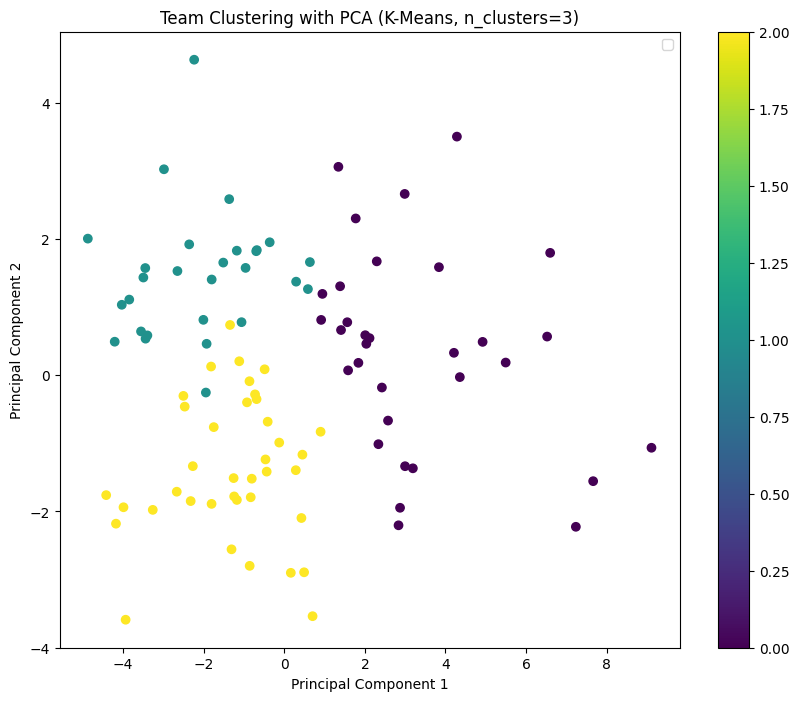

In [164]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=km3_clusters)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Team Clustering with PCA (K-Means, n_clusters=3)')
plt.legend()
plt.colorbar()
plt.show()

In [117]:
team_cluster_df[team_cluster_df['km_cluster_3'] == 2][['Rk', 'Squad', 'Country', 'LgRk', 'km_cluster_2', 'km_cluster_3']].head(10)

,Rk,Squad,Country,LgRk,km_cluster_2,km_cluster_3
24,25,Union Berlin,GER,5,0,2
30,31,Freiburg,GER,6,0,2
34,35,Köln,GER,7,0,2
35,36,Manchester Utd,ENG,6,0,2
36,37,West Ham,ENG,7,0,2
37,38,Nantes,FRA,9,0,2
41,42,Leicester City,ENG,8,0,2
42,43,Mainz 05,GER,8,0,2
43,44,Hoffenheim,GER,9,0,2
44,45,Brighton,ENG,9,0,2


In [118]:
team_cluster_stats = team_cluster_df.iloc[:,4:].groupby('km_cluster_3').mean()
print(team_cluster_stats)

                      W         GD     Pts/G    xGD/90  Prog_Passes    Shots_OT  Carries_3rd  Tackles_Won     Crosses  Aerials_Won  Interceptions  Clearances      Blocks  Fouls_Committed  Fouls_Drawn  Penalty_Con  Penalty_Won    Errors   Offsides  Own_Goals  Yellow_Cards  Red_Cards  km_cluster_2
km_cluster_3                                                                                                                                                                                                                                                                                            
0             20.687500  30.562500  1.878125  0.605000  1432.468750  185.531250   571.125000   394.312500  456.593750   566.531250     533.218750  590.125000  514.906250       478.625000   497.625000     4.562500     5.500000  8.906250  69.375000   1.187500     74.218750   3.250000           1.0
1             10.000000 -16.214286  1.086429 -0.298929  1048.071429  131.000000   414.464286   404.500000  43

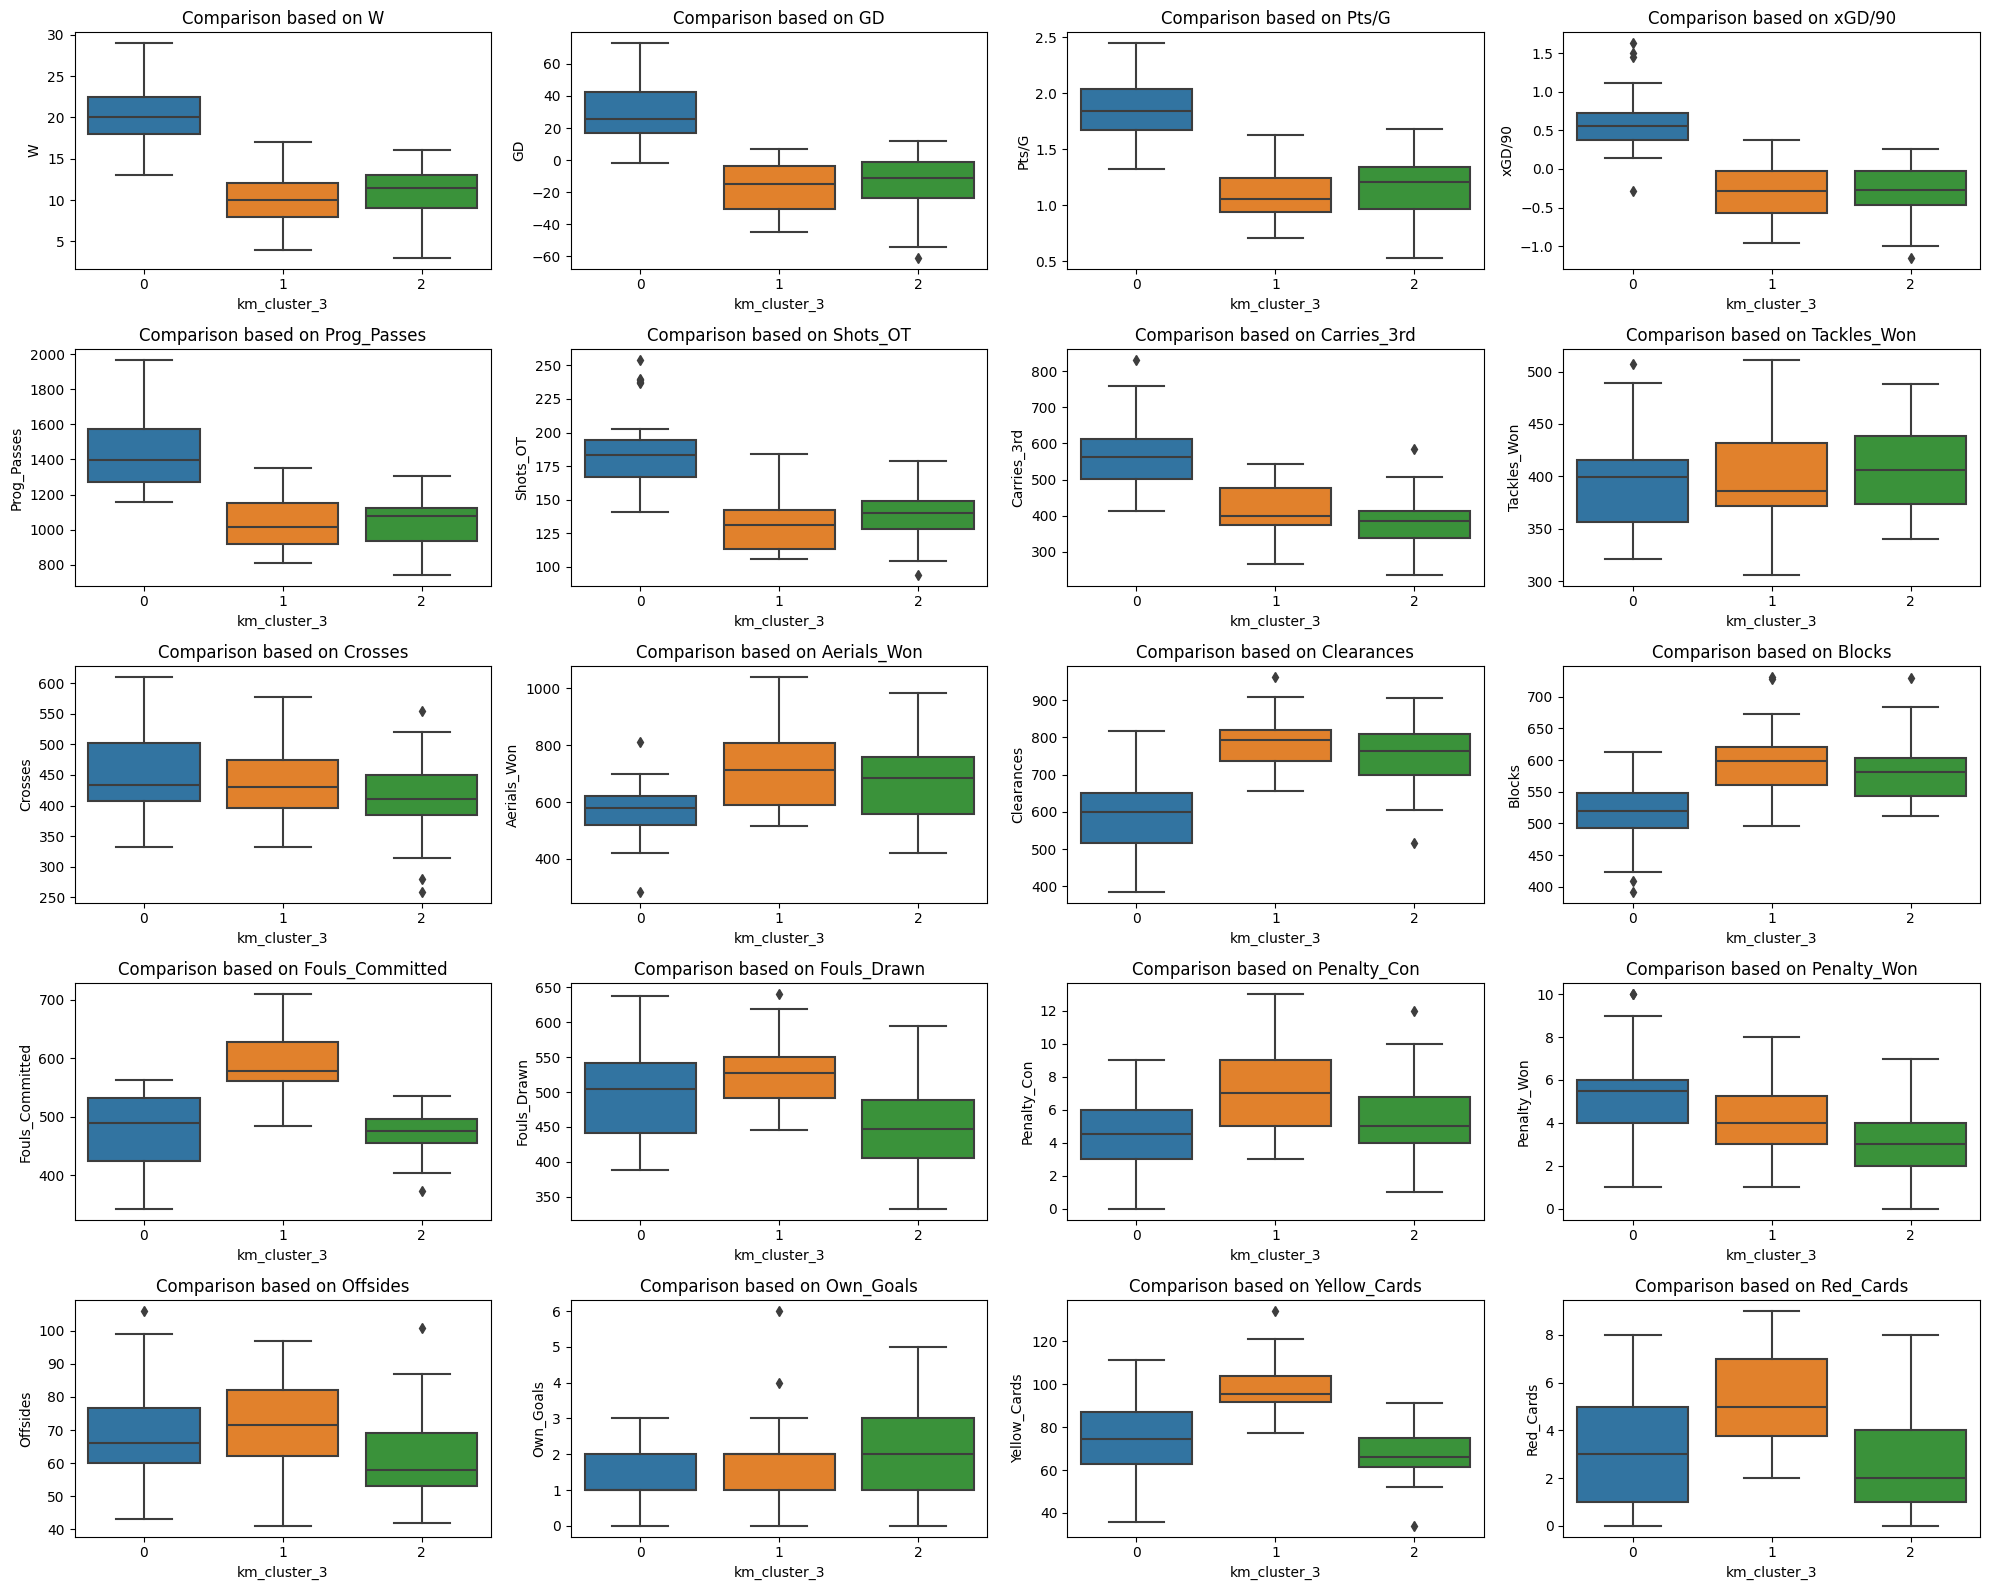

In [119]:
# List of features you want to compare
selected_features = ['W', 'GD', 'Pts/G', 'xGD/90','Prog_Passes', 'Shots_OT', 'Carries_3rd', 'Tackles_Won', 'Crosses', 'Aerials_Won',
                     'Clearances', 'Blocks', 'Fouls_Committed', 'Fouls_Drawn', 'Penalty_Con', 'Penalty_Won', 
                     'Offsides', 'Own_Goals', 'Yellow_Cards', 'Red_Cards']

# Set up the matplotlib figure
plt.figure(figsize=(20, 16))

# Loop through the features and create a subplot for each feature
for i, feature in enumerate(selected_features, 1):
    plt.subplot(5, 4, i)  # Adjust the grid dimensions (2, 3) based on the number of features
    sns.boxplot(x='km_cluster_3', y=feature, data=team_cluster_df)
    plt.title(f'Comparison based on {feature}')

plt.tight_layout()
plt.show()

# 2. Hierarchical Clustring


### a) The Linkage Matrix:

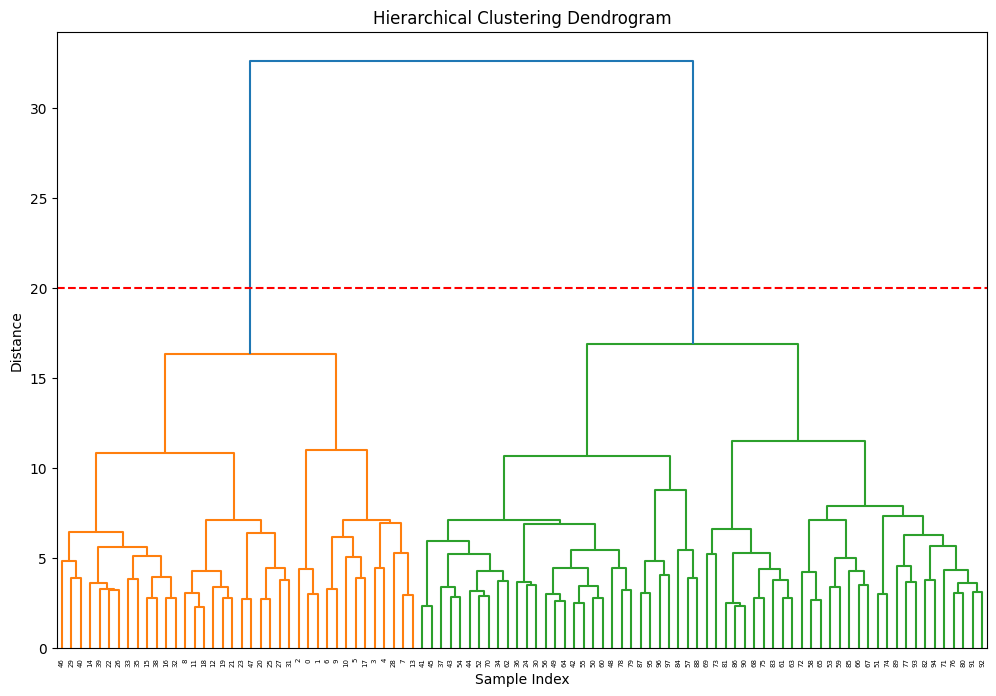

In [120]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# 'scaled_data' is your standardized dataset
Z = linkage(scaled_data, method='ward')  # 'ward' is one method of calculating linkage. 

# Plot the Dendrogram:
plt.figure(figsize=(12, 8))
dendrogram(Z)

# Adjust this threshold based on the structure of your dendrogram
distance_threshold = 20  # Example threshold, adjust based on your dendrogram
plt.axhline(y=distance_threshold, color='r', linestyle='--')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Applying Hierarchical Clustering (n_clusters = 2)

In [165]:
from sklearn.cluster import AgglomerativeClustering

n_clusters = 2  # Replace with the number of clusters you determined
cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
cluster_labels = cluster.fit_predict(scaled_data)
#count number of records in every cluster
pd.Series(cluster_labels).value_counts()


0    60
1    38
Name: count, dtype: int64

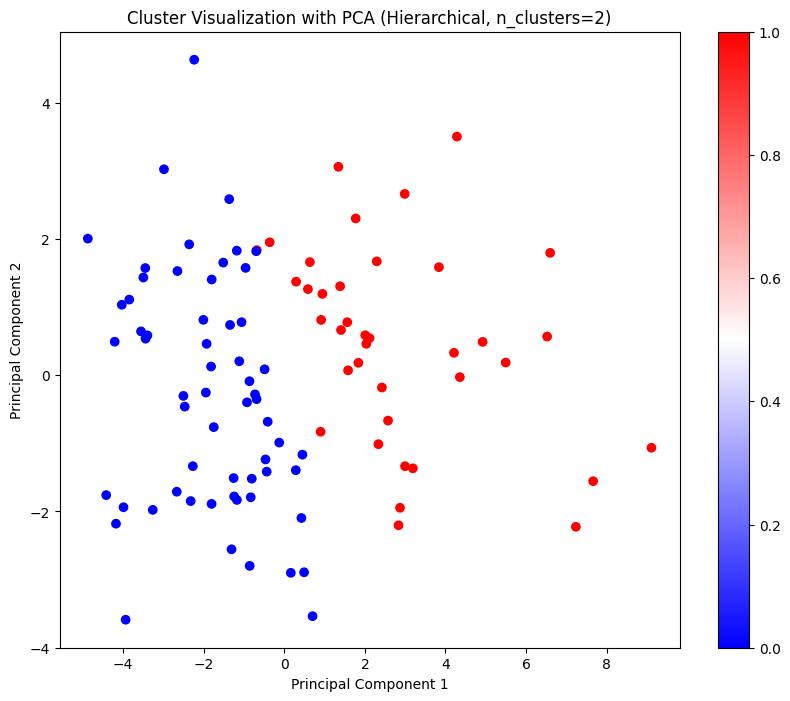

In [143]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels, cmap='bwr')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Visualization with PCA (Hierarchical, n_clusters=2)')
plt.colorbar()
plt.show()

In [ ]:
team_cluster_df['h_cluster_2'] = cluster_labels
team_cluster_df[['Rk', 'Squad', 'Country', 'LgRk', 'h_cluster_2']]

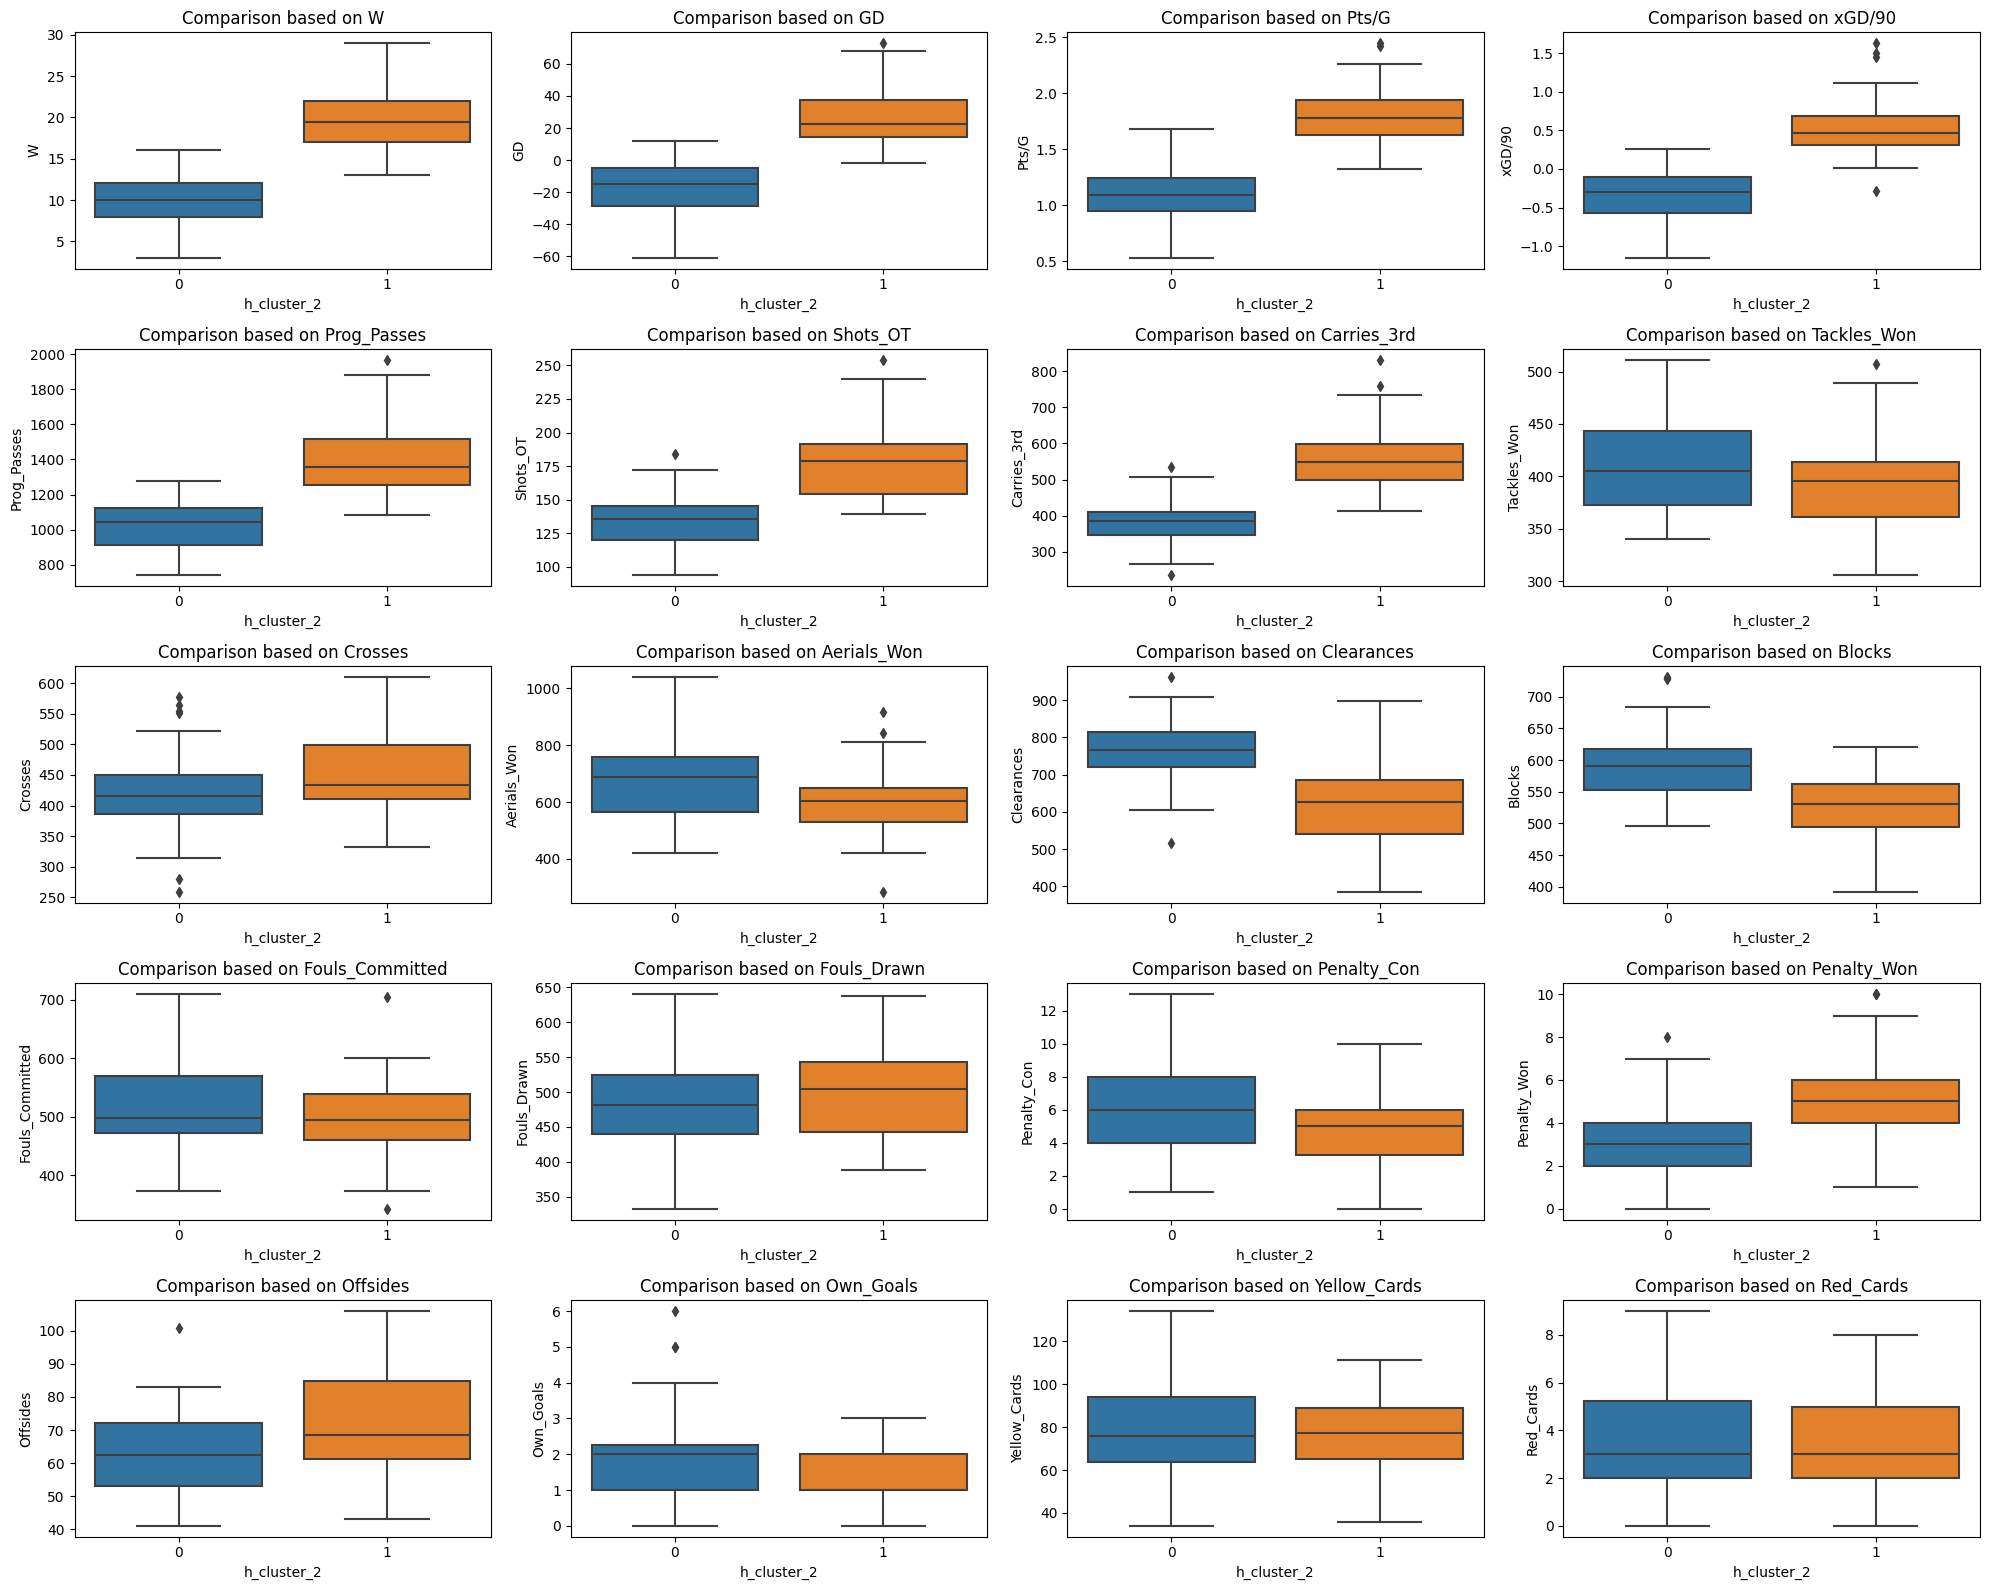

In [124]:
# List of features you want to compare
selected_features = ['W', 'GD', 'Pts/G', 'xGD/90','Prog_Passes', 'Shots_OT', 'Carries_3rd', 'Tackles_Won', 'Crosses', 'Aerials_Won',
                     'Clearances', 'Blocks', 'Fouls_Committed', 'Fouls_Drawn', 'Penalty_Con', 'Penalty_Won', 
                     'Offsides', 'Own_Goals', 'Yellow_Cards', 'Red_Cards']

# Set up the matplotlib figure
plt.figure(figsize=(20, 16))

# Loop through the features and create a subplot for each feature
for i, feature in enumerate(selected_features, 1):
    plt.subplot(5, 4, i)  # Adjust the grid dimensions (2, 3) based on the number of features
    sns.boxplot(x='h_cluster_2', y=feature, data=team_cluster_df)
    plt.title(f'Comparison based on {feature}')

plt.tight_layout()
plt.show()

In [125]:
# Assuming 'data_selected_features' includes your cluster labels and country information
offensive_teams = team_cluster_df[(team_cluster_df['h_cluster_2'] == 1)]
top__offensive_countries = offensive_teams['Country'].value_counts().head()
print(top__offensive_countries)
print(offensive_teams[['Squad', 'Country']])

Country
ITA    11
FRA     9
ESP     8
ENG     6
GER     4
Name: count, dtype: int64
              Squad Country
0   Manchester City     ENG
1         Liverpool     ENG
2     Bayern Munich     GER
3         Paris S-G     FRA
4       Real Madrid     ESP
5             Milan     ITA
6             Inter     ITA
7            Napoli     ITA
8          Dortmund     GER
9           Chelsea     ENG
10        Barcelona     ESP
11       Leverkusen     GER
12        Tottenham     ENG
13        Marseille     FRA
14  Atlético Madrid     ESP
15          Sevilla     ESP
16         Juventus     ITA
17           Monaco     FRA
18          Arsenal     ENG
19           Rennes     FRA
20             Nice     FRA
21       RB Leipzig     GER
22            Betis     ESP
23            Lazio     ITA
25       Strasbourg     FRA
26             Roma     ITA
27             Lens     FRA
28       Fiorentina     ITA
29    Real Sociedad     ESP
31             Lyon     FRA
32       Villarreal     ESP
33         Atalanta 

# Applying Hierarchical Clustering (n_clusters = 4)

In [139]:
n_clusters = 4  # Replace with the number of clusters you determined
cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
cluster_labels = cluster.fit_predict(scaled_data)
#count number of records in every cluster
pd.Series(cluster_labels).value_counts()

2    30
0    30
3    25
1    13
Name: count, dtype: int64

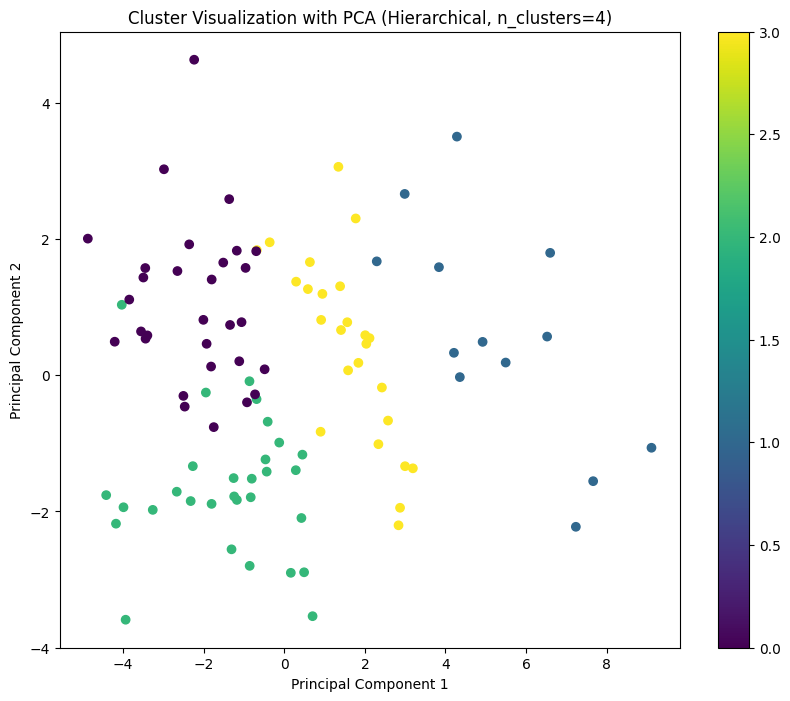

In [140]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Visualization with PCA (Hierarchical, n_clusters=4)')
plt.colorbar()
plt.show()

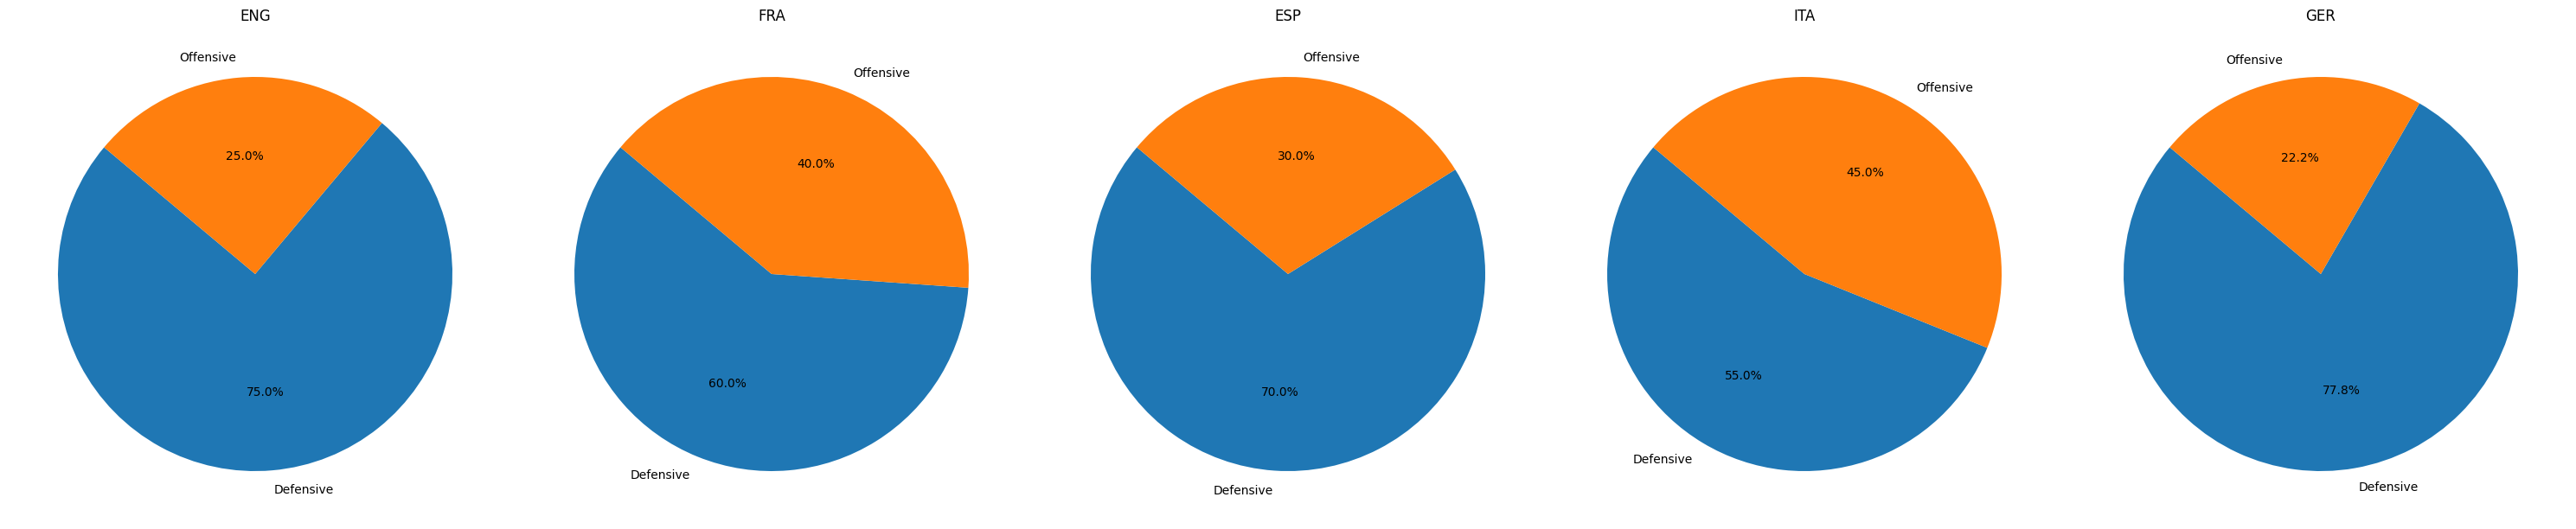

In [166]:

# Counting the number of teams in each country
country_counts = team_cluster_df['Country'].value_counts()

# Setting up the pie charts for each country
fig, axes = plt.subplots(1, len(country_counts), figsize=(len(country_counts) * 6, 6))

for i, (country, count) in enumerate(country_counts.items()):
    country_data = team_cluster_df[team_cluster_df['Country'] == country]
    cluster_counts = country_data['km_cluster_2'].value_counts()
    axes[i].pie(cluster_counts, labels=['Defensive', 'Offensive'], autopct='%1.1f%%', startangle=140)
    axes[i].set_title(country)

plt.tight_layout()
plt.show()


In [170]:
team_cluster_df

,Rk,Squad,Country,LgRk,W,GD,Pts/G,xGD/90,Prog_Passes,Shots_OT,Carries_3rd,Tackles_Won,Crosses,Aerials_Won,Interceptions,Clearances,Blocks,Fouls_Committed,Fouls_Drawn,Penalty_Con,Penalty_Won,Errors,Offsides,Own_Goals,Yellow_Cards,Red_Cards,km_cluster_2
0,1,Manchester City,ENG,1,29,73,2.45,1.63,1766,239,831,324,610,530,434,474,392,373,442,1,7,7,65,0,42,1,1
1,2,Liverpool,ENG,2,28,68,2.42,1.45,1967,237,691,366,554,621,552,566,462,422,395,0,5,7,63,1,50,1,1
2,3,Bayern Munich,GER,1,24,60,2.26,1.50,1884,254,644,391,495,540,544,418,489,343,432,2,1,12,76,1,36,2,1
3,4,Paris S-G,FRA,1,26,54,2.26,1.00,1579,202,733,408,363,284,488,434,409,391,468,3,6,11,93,1,79,4,1
4,5,Real Madrid,ESP,1,26,49,2.26,0.72,1569,240,760,404,483,444,520,537,480,460,557,5,10,14,106,0,76,0,1
5,6,Milan,ITA,1,26,38,2.26,0.74,1350,186,579,489,471,608,606,501,530,518,578,5,5,8,79,2,76,3,1
6,7,Inter,ITA,2,25,52,2.21,1.11,1515,238,575,402,568,659,462,520,501,513,480,4,7,7,57,1,71,0,1
7,8,Napoli,ITA,3,24,43,2.08,0.73,1342,187,611,403,407,431,465,457,493,496,541,1,9,2,66,1,63,2,1
8,9,Dortmund,GER,2,22,33,2.03,0.58,1426,165,460,404,332,541,512,551,513,393,445,6,6,9,73,2,63,1,1
9,10,Chelsea,ENG,3,21,43,1.95,0.82,1614,199,694,401,496,623,557,730,562,485,504,5,8,13,69,1,63,1,1
